In [12]:
#Téléchargement des données
!wget https://dl.dropboxusercontent.com/s/unjllviexkxcfa6/phase_1.zip?dl=0
!mv phase_1.zip?dl=0 ph.zip
!unzip ph.zip
!wget https://dl.dropboxusercontent.com/s/u79uyn8hwmjm6ch/phase_2.zip?dl=0
!mv phase_2.zip?dl=0 ph2.zip
!unzip ph2.zip

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'mv' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'unzip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'mv' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'unzip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [13]:
#Modules utiles
import numpy as np
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import *
from sklearn.pipeline import *
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import time as time
import pandas as pd
from sklearn.svm import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import *
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import *
from scipy.stats import *
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [14]:
#Recuperation des données depuis les fichiers
donnees_positive_train = np.fromfile('../phase_1/exp1-train-400pos.bin', dtype=np.float32).reshape([400, 5, 768])
donnees_negative_train = np.fromfile('../phase_1/exp1-train-2000neg.bin', dtype=np.float32).reshape([2000, 5, 768])

donnees_positive_train2 = np.fromfile('../phase_2/exp2-train-400pos.bin', dtype=np.float32).reshape([400, 5, 768])
donnees_negative_train2 = np.fromfile('../phase_2/exp2-train-2000neg.bin', dtype=np.float32).reshape([2000, 5, 768])


donnees_test = np.fromfile('../phase_1/exp12-test-1200.bin', dtype=np.float32).reshape([1200, 5, 768])
donnees_test2 = np.fromfile('../phase_2/exp12-test-1200.bin', dtype=np.float32).reshape([1200, 5, 768])

train_ds = np.vstack([donnees_positive_train, donnees_positive_train2, donnees_negative_train, donnees_negative_train2])

# Création des labels pour l'apprentissage supervisé

train_labels = np.zeros(4800)
train_labels[:800] = 1
train_labels = train_labels.ravel()

In [15]:
#Fonction permettant d'évaluer les différents modèles rapidement
def evaluation(model, X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    model.fit(X_train, y_train)

    #Affichage de différentes métriques
    ypred = model.predict(X_test)
    print(model.score(X_test,y_test))
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    #Affichage de la courbe "d'apprentissage"
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    return model
    

0.9641666666666666
[[999  17]
 [ 26 158]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1016
         1.0       0.90      0.86      0.88       184

    accuracy                           0.96      1200
   macro avg       0.94      0.92      0.93      1200
weighted avg       0.96      0.96      0.96      1200

0.96
[[995  15]
 [ 33 157]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1010
         1.0       0.91      0.83      0.87       190

    accuracy                           0.96      1200
   macro avg       0.94      0.91      0.92      1200
weighted avg       0.96      0.96      0.96      1200

0.9058333333333334
[[921  79]
 [ 34 166]]
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1000
         1.0       0.68      0.83      0.75       200

    accuracy                           0.91      1200
   macro avg    

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

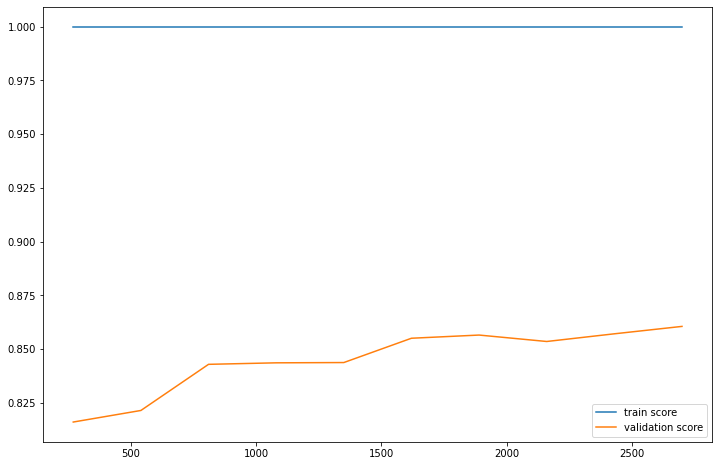

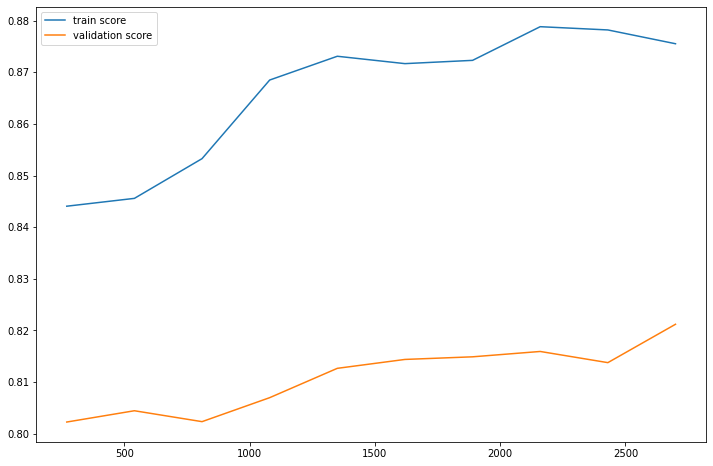

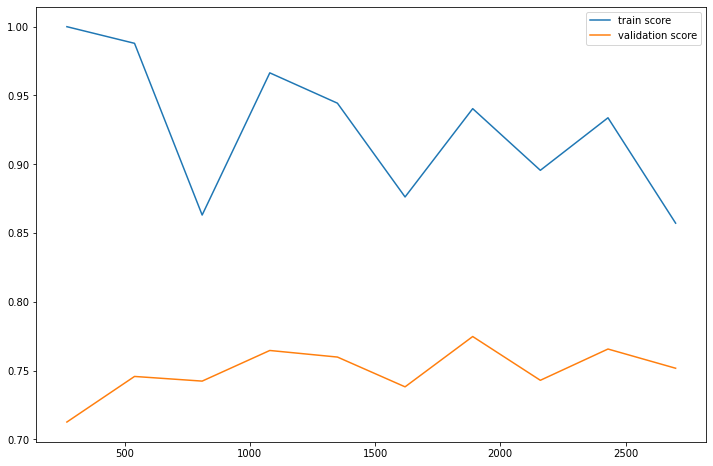

In [16]:
#Exemple de test de différents modèles sur un signal ecart-type formé à partir des cinq canaux de chaque echantillon
test = np.std(train_ds, axis=1)

evaluation(RandomForestClassifier(), test,train_labels)
evaluation(SVC(), test,train_labels)
evaluation(MLPClassifier(), test,train_labels)

In [17]:
#exemple d'implémentation d'une méthode d'outlier detection : isoforest
clf = IsolationForest(n_estimators=20, warm_start=True)
clf.fit(train_ds[:,4])

a = clf.predict(train_ds[:,4])

#calcul des proportions d'outliers dans chaque classe

n=a.size
print(a[a==1].size/n)
print(a[a==-1].size/n)

z = a[:800]
y= a[800:]

print(z[z==1].size/z.size)
print(z[z==-1].size/z.size)
print(y[y==1].size/y.size)
print(y[y==-1].size/y.size)

# création de datasets et labels sans outliers 
clean_ds = train_ds[a==1]
clean_labels = train_labels[a==1]
print(clean_labels.shape, clean_ds.shape)

0.9420833333333334
0.057916666666666665
0.82625
0.17375
0.96525
0.03475
(4522,) (4522, 5, 768)


In [18]:
#exemple de feature extraction
std_ds =  np.std(train_ds, axis=1).reshape(4800,1,768)
max_ch12_ds = np.max(train_ds,axis=1).reshape(4800,1,768)
min_ch12_ds = np.min(train_ds,axis=1).reshape(4800,1,768)

new_ds = np.concatenate((train_ds,std_ds,max_ch12_ds,min_ch12_ds), axis=1)

In [20]:
#Optimisation des modèles pour les cinq canaux (les hyperparamètres de chaque modèle sont indépendant) SMOTE
def model_prediction(X, Y):
    #liste contenant chaque modèle entrainé dans l'ordre des canaux d'entrée
    splitted_models = []
    #liste contenant les predictions faites par tous les modèles sur les données d'entrainement pour ultérieurement entrainer un modèle d'assemblage
    listePrediction = []

    #création des ensembles d'entrainement et de test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

    #paramètres pour l'optimisation de paramètres
    params = {'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50,100,200]}
    #grid random pour l'optimisation des paramètres ci-dessus car trop de combinaisons possibles
    #rando_grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions= params, n_iter = 10, cv = 4, verbose=2, random_state=42, n_jobs = -1)

    #modèle de classification qui sera entrainera sur chaque canal du dataset
    model = RandomForestClassifier()
    #grid normale avec peu de paramètres pour trouver les meilleurs 
    grid = GridSearchCV(model, {"n_estimators":[50,75,100]})

    #Data augmentation
    smote = SMOTE(random_state=0)
    nearmiss = NearMiss(version=3)

    for i in range(6):
        #X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X=X[:,i], y=train_labels)
        #X_train_smote, y_train_smote= smote.fit_resample(X[:,i], Y)
        grid.fit(X[:,i],Y)
        splitted_models.append(grid.best_estimator_)

        #Evaluation du modèle avec differentes métriques
        print(f"Performance sur le canal {i+1} : {splitted_models[i].score(X_test[:,i], Y_test)}")
        print("infos : ",grid.best_params_, grid.best_score_)
        ypred = splitted_models[i].predict(X_test[:,i])
        print(confusion_matrix(Y_test, ypred))
        print(classification_report(Y_test, ypred))

        #Ajout des prédictions du modèle actuel sur la liste qui sera retournée
        listePrediction.append( splitted_models[i].predict_proba(X[:,i])[:,1] )


    listePrediction = (np.array(listePrediction)).T
    print(listePrediction, listePrediction.shape)

    return (listePrediction, splitted_models)

t1 = time.time()
predictions, modeles_canaux = model_prediction(new_ds, train_labels)
t2 = time.time()
print(f"Le programme a mis {t2-t1} s à s'éxecuter")

Performance sur le canal 1 : 1.0
infos :  {'n_estimators': 50} 0.9418749999999999
[[1010    0]
 [   0  190]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1010
         1.0       1.00      1.00      1.00       190

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Performance sur le canal 2 : 1.0
infos :  {'n_estimators': 50} 0.943125
[[1010    0]
 [   0  190]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1010
         1.0       1.00      1.00      1.00       190

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Performance sur le canal 3 : 1.0
infos :  {'n_estimators': 50} 0.8958333333333334
[[1010    0]
 [   0  190]]
              precision    re

In [21]:
#Modèle d'assemblage des données
def merge_channels(X, Y, modele, params):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.001)
    #smote = SMOTE(random_state=0)
    #X_train_smote, y_train_smote= smote.fit_resample(X_train, Y_train)


    grid = GridSearchCV(modele, param_grid=params, cv=5)
    grid.fit(X,Y)
    modele = (grid.best_estimator_)

    #Evaluation du modèle avec différentes métriques
    print("infos : ",grid.best_params_, grid.best_score_)
    print(f"Performance sur l'assembleur : {modele.score(X_test, Y_test)}")
    ypred = modele.predict(X_test)
    print(confusion_matrix(Y_test, ypred))
    print(classification_report(Y_test, ypred))

    return modele

param_svc={'C':[0.1,0.25, 0.5], 'gamma':[0.01,0.1,0.001,0.0001], 'kernel':['rbf','linear'] }
param_knn={'n_neighbors':np.arange(5,50,5)}
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}


listeModeles = [(SVC(),param_svc),
                (BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5), {}),
                (MLPClassifier(),{}),
                (SVC(),{})
                ]
modeles_assemblage =[]

for model in listeModeles:
    modeles_assemblage.append(merge_channels(predictions, train_labels, model[0],model[1]))

infos :  {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'} 1.0
Performance sur l'assembleur : 1.0
[[5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

infos :  {} 1.0
Performance sur l'assembleur : 1.0
[[4 0]
 [0 1]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

infos :  {} 1.0
Performance sur l'assembleur : 1.0
[[4 0]
 [0 1]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         1

    acc

In [22]:
#Reconstruction de la sortie des cinq modèles en un np.array qu'utilisera le modèle d'assemblage
def predict_splitted_score(X, models):
    listePrediction = []

    for i in range(6):
        
        listePrediction.append(models[i].predict_proba(X[:,i])[:,1])

    listePrediction = np.array(listePrediction).T
    return listePrediction

In [23]:
#Fonction pour maximiser les predictions de classe 1
def assemblage_modele(l1, l2):
  sortie=[]
  for i in range(len(l1)):
    if l1[i]==1 or l2[i]==1:
      sortie.append(1)
    else:
      sortie.append(0)
  return sortie

In [25]:
#Bloc pour tous les traitements finaux : création du fichier rendu.csv qui sera soumis sur Kaggle
t1 = time.time()

#predictions des différents modèles entrainés sur les données de test officielles
feature_extract = predict_splitted_score(np.concatenate((donnees_test, np.std(donnees_test, axis=1).reshape(1200,1,768)), axis=1), modeles_canaux)

#maximisation des élements de classe 1 (car jamais assez nombreux dans les prédictions)
m=modeles_assemblage
assembleur_maximise = assemblage_modele(assemblage_modele(assemblage_modele( m[0].predict(feature_extract).astype(int) ,m[1].predict(feature_extract).astype(int)),assemblage_modele( m[2].predict(feature_extract).astype(int) ,m[0].predict(feature_extract).astype(int))), assemblage_modele( m[1].predict(feature_extract).astype(int) ,m[2].predict(feature_extract).astype(int)))

sortie = pd.Series(assembleur_maximise)

nombre_un = len(sortie[sortie==1])
print(f"Number of 1  :    {nombre_un}")
print(f"Max précision théorique : {(1000+nombre_un)/1200}")
print(sortie)

sortie.to_csv("rendu.csv",header=["Id,Outcome"])
t2=time.time()
print(f"Le programme a mis {t2-t1} s à s'éxecuter")

#Correction de la première ligne
with open('rendu.csv', 'r') as file:
    data = file.readlines()

data[0] = 'Id,Outcome\n'

with open('rendu.csv', 'w') as file:
    file.writelines( data )

Number of 1  :    187
Max précision théorique : 0.9891666666666666
0       1
1       0
2       0
3       0
4       0
       ..
1195    0
1196    0
1197    0
1198    0
1199    0
Length: 1200, dtype: int64
Le programme a mis 0.49691152572631836 s à s'éxecuter


In [26]:
#Tests de performances sur canal indépendant
def canal(X, Y, i, modele, params):
    print(f"Canal {i+1} modèle {modele}")
    X_train, X_test, Y_train, Y_test = train_test_split(X[:,i], Y, test_size=0.25)
    
    grid = GridSearchCV(modele, param_grid=params, cv=8)
    grid.fit(X_train,Y_train)
    modele = (grid.best_estimator_)
    print("infos : ",grid.best_params_, grid.best_score_)
    print(f"Performance sur le canal {i+1} : {modele.score(X_test, Y_test)}")
    ypred = modele.predict(X_test)
    print(confusion_matrix(Y_test, ypred))
    print(classification_report(Y_test, ypred))

    #N, train_score, val_score = learning_curve(modele, X_train, Y_train,
    #                                          cv=4, scoring='f1',
    #                                           train_sizes=np.linspace(0.1, 1, 10))
    
    
    #plt.figure(figsize=(12, 8))
    #plt.plot(N, train_score.mean(axis=1), label='train score')
    #plt.plot(N, val_score.mean(axis=1), label='validation score')
    #plt.legend()
    return modele


param_svc={}
param_mlp={}
listeModeles = [(SVC(), {'C':[0.5,1.0,10.0]}),
                (RandomForestClassifier(), {'n_estimators':[100,150]})
                ]

for i in listeModeles:
    canal(train_ds, train_labels, 1, i[0],i[1])


Canal 2 modèle SVC()
infos :  {'C': 1.0} 0.9422222222222223
Performance sur le canal 2 : 0.9333333333333333
[[963  17]
 [ 63 157]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       980
         1.0       0.90      0.71      0.80       220

    accuracy                           0.93      1200
   macro avg       0.92      0.85      0.88      1200
weighted avg       0.93      0.93      0.93      1200

Canal 2 modèle RandomForestClassifier()
infos :  {'n_estimators': 150} 0.9519444444444445
Performance sur le canal 2 : 0.95
[[996  21]
 [ 39 144]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1017
         1.0       0.87      0.79      0.83       183

    accuracy                           0.95      1200
   macro avg       0.92      0.88      0.90      1200
weighted avg       0.95      0.95      0.95      1200



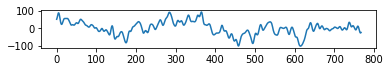

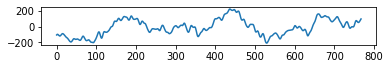

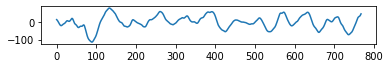

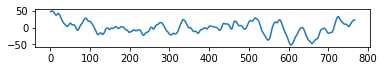

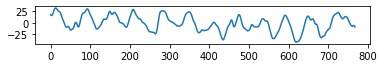

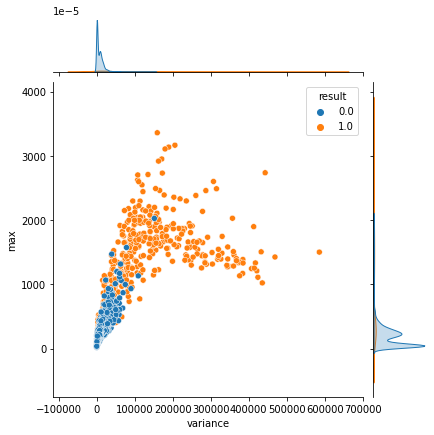

In [ ]:
from pandas.core.internals import array_manager
#Outlier visualisation 


def afficher_echantillon(y):
  x = np.arange(0,768)
  for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(x, train_ds[y,i])
    plt.show()

#Affichage des signaux d'un echantillon anormal
afficher_echantillon(1047)

a=pd.DataFrame(np.var(train_ds[:,1],axis=1), columns=["variance"])
a["max"]=np.max(train_ds[:,1],axis=1 )
a["result"]=train_labels

import seaborn as sns

#affichage des echantillons selon deux caractéristiques le max et la variance
sns.jointplot(data=a,x="variance",y="max",hue="result")

#Outlier removal manuel après observation
clino_ds = np.delete(train_ds,[540, 1047, 1728, 2100], 0)
clino_labels = np.delete(train_labels,[540, 1047, 1728, 2100], 0)

